In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# globally set the graph style and font size 
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)  
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=13)    
plt.rc('ytick', labelsize=13)    
plt.rc('legend', fontsize=13)    
plt.rc('font', size=13)  # controls default text sizes

In [3]:
df_fifa = pd.read_csv('players_21.csv')
df_fifa.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3


### This is a Fifa players dataset that will help us compare non-traditional football nations like the USA and Canada with big football nations such as England, Brazil, and Argentina.

In [4]:
df_fifa.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

### The Dataset is clean and prepared for Visualization



In [5]:
# Extracting the dataframe required for visualization from the given dataset
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa[df_fifa["nationality"] .isin(country)]

### Average rating of football player by Nationality

In [6]:
# Extra preprocessing necessary only for this plot
average_rating = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
print(average_rating)


     nationality    overall
0      Argentina  67.793803
1         Brazil  70.961669
2         Canada  62.346154
3        England  62.878338
4  United States  63.507937


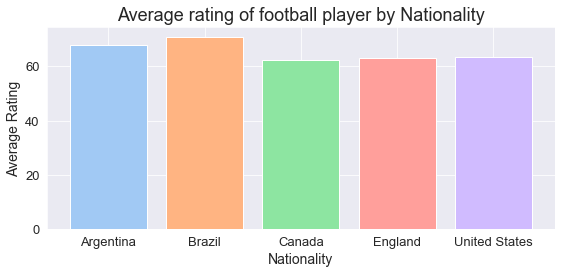

In [7]:
# The name of the categorical variable (nationality) and their lengths (overall ratings)
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(average_rating['nationality'], average_rating['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Average rating of football player by Nationality')
plt.show()

Apparently, there’s no big difference between the rating of an average player from Canada, the USA, and England. However, average players don’t make it to the national teams, but only the top players in each country do it, so if we get the average rating of the top 20 players, the plot would change

In [8]:
# To get the top 20 players of each country we need to do some preprocessing
df_top20 = pd.concat(
[df_country[df_country['nationality']=='Argentina'][:20], 
 df_country[df_country['nationality']=='Brazil'][:20], 
 df_country[df_country['nationality']=='England'][:20], 
 df_country[df_country['nationality']=='Canada'][:20], 
 df_country[df_country['nationality']=='United States'][:20]]
)
barplot = df_top20.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

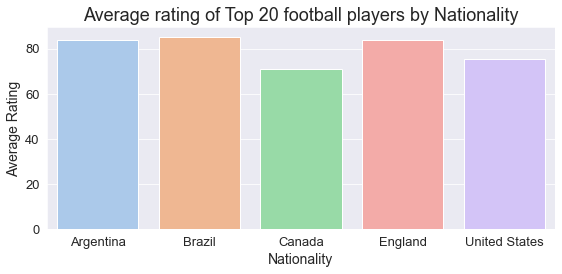

In [9]:
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Average rating of Top 20 football players by Nationality', xlabel='Nationality', ylabel='Average Rating')
plt.show()

The difference in ratings between top players is evident. This reveals why the USA and Canada aren’t big football nations yet

Now let’s see how many players play in the top football leagues. To do so, we need to group the data by nationality and league 
we’ll leave out the Premier League since most England players play in this competition

In [10]:
league = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A',
 'German 1. Bundesliga'])]
league = league.groupby(['nationality', 'league_name'], as_index=False).count()


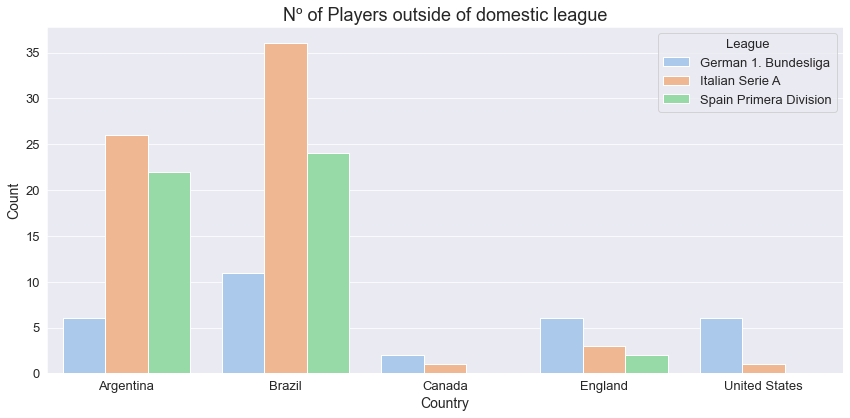

In [11]:
# 'N' variables can be easily plotted by adding the hue=‘’
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=league['nationality'], y=league['sofifa_id'], hue=league['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

As we can see, most Argentine and Brazilian footballers play in the top leagues while Canadians and Americans don’t. Players in top leagues make an impact on the national team's success in competitions, so this explains why Brazil and Argentina are big football nations.

### Height distribution of football players

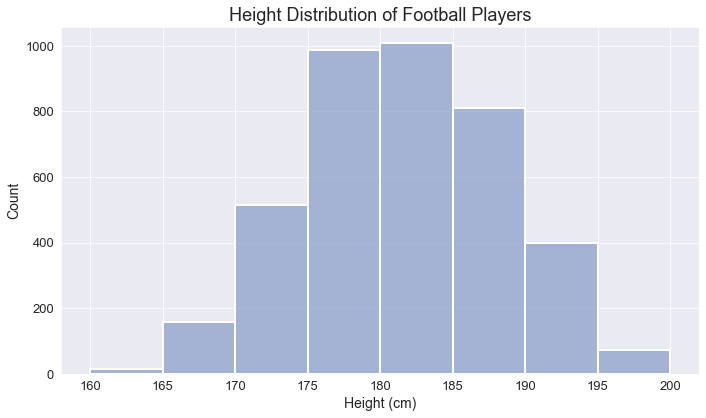

In [12]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]

ax = sns.histplot(data=df_country, x='height_cm', bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
ax.set(title='Height Distribution of Football Players', xlabel='Height (cm)', ylabel='Count')
plt.show()

The histogram reveals that most players’ height is between 175-185 cm, so it seems that being taller than 185cm isn’t so important in football.

### Distribution of height in players from different nations with boxplots

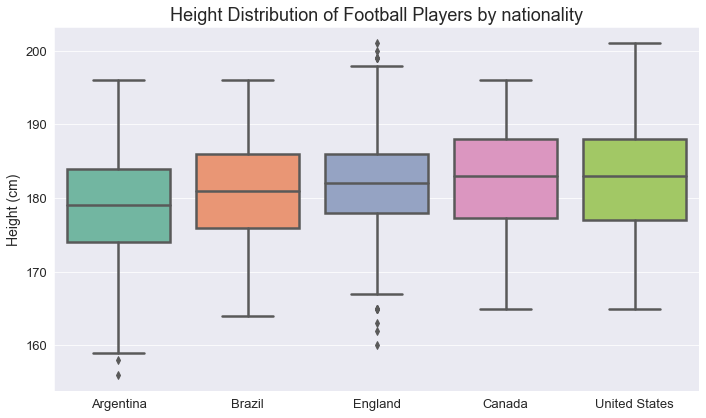

In [13]:
# The name of the categorical variable (nationality) and the name of the numerical variable (height_cm)
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Height Distribution of Football Players by nationality', xlabel='', ylabel='Height (cm)')
plt.show()


Now the boxplot reveals that a national team doesn’t need many tall football players to succeed in competitions since the median of Argentina and Brazil is lower than in the rest of the countries. Argentina even presents the shortest football players among the five countries represented by the long bottom whisker.

### The relationship between the height and weight of players.

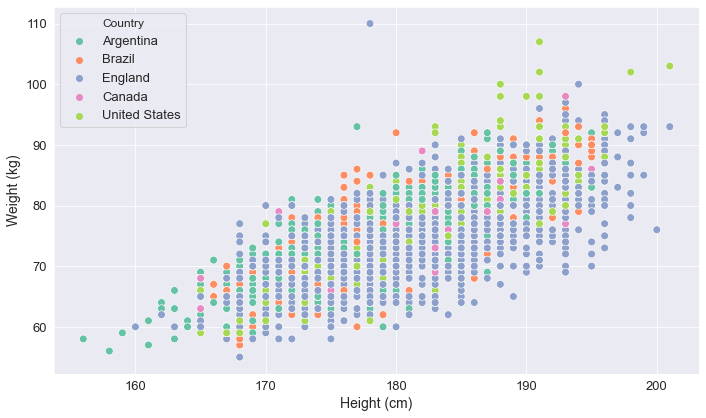

In [14]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
# 's' to specify the dot sizes, 'hue' to differentiate the countries
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

From this scatterplot, we can see that weight and height distribution fit a simple linear regression.

### Player Value by Clubs

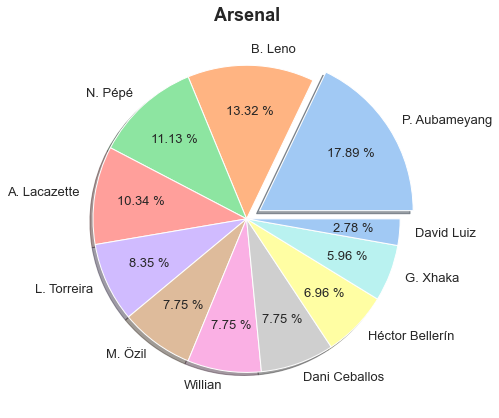

In [15]:
# Preprocessing to get the data needed from the given dataset
piechart = df_fifa[df_fifa['club_name']=='Arsenal']
piechart = piechart[:11].sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 'autopct' to round the numbers
# 'explode' to highlight a specific player
# 'pctdistance' to adjust the distance of the labels
# 'shadow=True' to give the chart a solid appearance
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%1.2f %%', explode=myexplode, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Arsenal', weight='bold')
plt.show()

The piechart shows that P.Aubameyang is the most valuable player in his club.
### Side by side to see the impact of this player on his club and National team

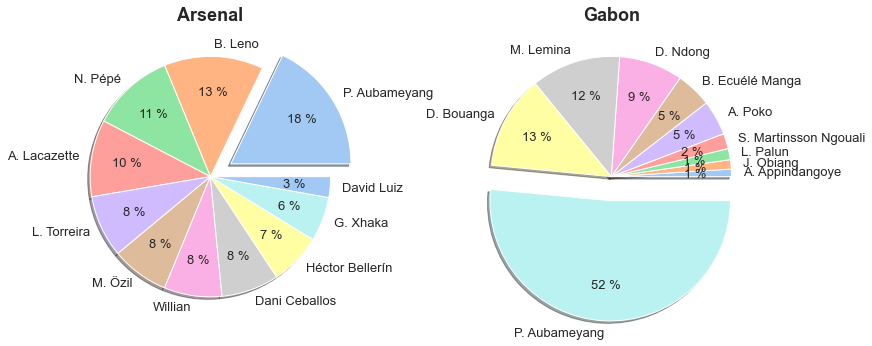

In [16]:
# Preprocessing
piechart2 = df_fifa[df_fifa['nationality']=='Gabon']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)
colors = sns.color_palette('pastel')

explode_list = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Arsenal', weight='bold')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('Gabon', weight='bold')
plt.show()

Now we can verify that P. Aubameyang is by far the most valuable player for both his country and club.

We’ll plot the ratings of the top football players to see how the rating evolved over the past 5 years. To do so, we have to read the Fifa dataset from 2017 and wrangle the data.



In [17]:
# preprocessing
df_fifa21 = pd.read_csv('players_21.csv')
df_fifa20 = pd.read_csv('players_20.csv')
df_fifa19 = pd.read_csv('players_19.csv')
df_fifa18 = pd.read_csv('players_18.csv')
df_fifa17 = pd.read_csv('players_17.csv')
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk', 'M. Salah']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('year')
lineplot

short_name,Cristiano Ronaldo,K. De Bruyne,K. Mbappé,L. Messi,M. Salah,V. van Dijk
year,,,,,,
2017,94.0,88.0,NaN,93.0,81.0,79.0
2018,94.0,89.0,83.0,93.0,83.0,83.0
2019,94.0,91.0,87.0,94.0,88.0,85.0
2020,93.0,91.0,89.0,94.0,90.0,90.0
2021,92.0,91.0,90.0,93.0,90.0,90.0


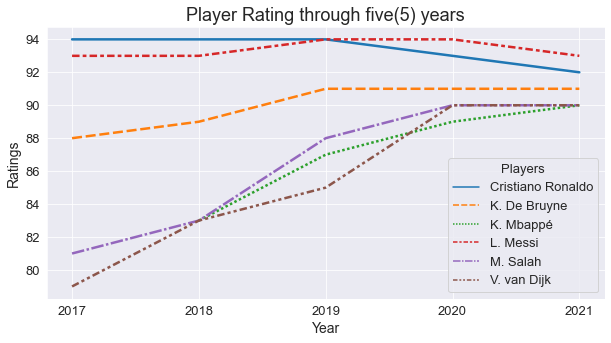

In [18]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Year', ylabel='Ratings', title='Player Rating through five(5) years', xticks=[2017, 2018, 2019, 2020, 2021])
ax.legend(title='Players', title_fontsize = 13)
plt.show()